In [13]:
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

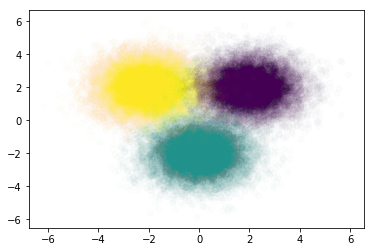

In [14]:
D = 2
K = 3
N = int(K*1.5e4)

X0 = np.random.randn((N//K),D) + np.array([2,2])
X1 = np.random.randn((N//K),D) + np.array([0,-2])
X2 = np.random.randn((N//K),D) + np.array([-2,2])
X = np.vstack((X0,X1,X2))

y = np.array([0]*(N//K) + [1]*(N//K) + [2]*(N//K))

plt.scatter(X[:,0], X[:,1], c = y, alpha = 0.01)

In [15]:
# Functions

def one_hot_encode(y):
    N = len(y)
    K = len(set(y))
    
    Y = np.zeros((N,K))
    
    for i in range(N):
        Y[i,y[i]] = 1
        
    return Y

def ReLU(H):
    return H*(H > 0)

def softmax(H):
    eH = np.exp(H)
    return eH / eH.sum(axis = 1, keepdims = True)

def feed_forward(X, W1, b1, W2, b2):
    Z1 = ReLU(np.matmul(X,W1) + b1)
    P = softmax(np.matmul(Z1,W2) + b2)
    return Z1, P

def cross_entropy(Y,P):
    return -np.sum(Y*np.log(P))

def accuracy(Y,P):
    return np.mean(Y.argmax(axis = 1) == P.argmax(axis = 1))

In [16]:
# Data Prep

Y = one_hot_encode(y)

In [17]:
# Creat Initial Weights

M = 4

W1_0 = np.random.randn(D,M)
b1_0 = np.random.randn(M)
W2_0 = np.random.randn(M,K)
b2_0 = np.random.randn(K)

Accuracy: 0.9698444444444444


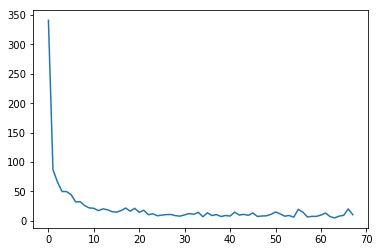

In [18]:
# Train the Model with Momentum Gradient Descent

W1 = W1_0.copy()
b1 = b1_0.copy()
W2 = W2_0.copy()
b2 = b2_0.copy()

J2 = []
eta = 1e-5
epochs = 15

mu = 0.9

Vw2 = 0
Vw1 = 0
Vb2 = 0
Vb1 = 0


t0_m2 = dt.datetime.now()

for epoch in range(epochs):
    
    s = np.arange(X.shape[0])
    np.random.shuffle(s)
    
    X = X[s]
    Y = Y[s]
    
    for i in range(int(N/100)):
        x_i = X[i*100:(i+1)*100,:]
        y_i = Y[i*100:(i+1)*100,:]
        
        z1_i, p_i = feed_forward(x_i, W1, b1, W2, b2)
        J2.append(cross_entropy(y_i,p_i))
        
        dH2 = p_i - y_i
        dW2 = np.matmul(z1_i.T, dH2)
        Vw2 = mu*Vw2 - eta*dW2
        Vb2 = mu*Vb2 -eta*dH2.sum(axis = 0)
        W2 += Vw2
        b2 += Vb2
        
        dZ1 = np.matmul(dH2, W2.T)
        dH1 = dZ1*(z1_i > 0)
        dW1 = np.matmul(x_i.T, dH1)
        Vw1 = mu*Vw1 - eta*dW1
        Vb1 = mu*Vb1 - eta*dH1.sum(axis = 0)
        W1 += Vw1
        b1 += Vb1

P = feed_forward(X, W1, b1, W2, b2)[-1]
print("Accuracy: {}".format(accuracy(Y,P)))
plt.plot(J2[::100])

t_run_m = (dt.datetime.now() - t0_m2).seconds

Accuracy: 0.9504666666666667


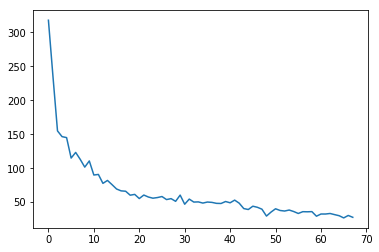

In [19]:
# Train the Model with Stochastic Gradient Descent

W1 = W1_0.copy()
b1 = b1_0.copy()
W2 = W2_0.copy()
b2 = b2_0.copy()

J = []
eta = 1e-5
epochs = 15

t0_batch = dt.datetime.now()

for epoch in range(epochs):
    
    s = np.arange(X.shape[0])
    np.random.shuffle(s)
    
    X = X[s]
    Y = Y[s]
    
    for i in range(int(N/100)-1):
        x_i = X[i*100:(i+1)*100,:]
        y_i = Y[i*100:(i+1)*100,:]
        
        z1_i, p_i = feed_forward(x_i, W1, b1, W2, b2)
        J.append(cross_entropy(y_i,p_i))
        
        dH2 = p_i - y_i
        dW2 = np.matmul(z1_i.T, dH2)
        W2 -= eta*dW2
        b2 -= eta*dH2.sum(axis = 0)
        
        dZ1 = np.matmul(dH2, W2.T)
        dH1 = dZ1*(z1_i > 0)
        dW1 = np.matmul(x_i.T, dH1)
        W1 -= eta*dW1
        b1 -= eta*dH1.sum(axis = 0)

P = feed_forward(X, W1, b1, W2, b2)[-1]
print("Accuracy: {}".format(accuracy(Y,P)))
plt.plot(J[::100])
t_run_batch = (dt.datetime.now() - t0_batch).seconds

Accuracy: 0.9694222222222222


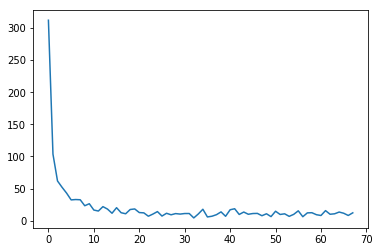

In [225]:
# Train the Model with nest_Momentum Gradient Descent

W1 = W1_0.copy()
b1 = b1_0.copy()
W2 = W2_0.copy()
b2 = b2_0.copy()

J3 = []
eta = 1e-5
epochs = 15

mu = 0.9

Vw2 = 0
Vw1 = 0
Vb2 = 0
Vb1 = 0


t0_m3 = dt.datetime.now()

for epoch in range(epochs):
    
    s = np.arange(X.shape[0])
    np.random.shuffle(s)
    
    X = X[s]
    Y = Y[s]
    
    for i in range(int(N/100)):
        x_i = X[i*100:(i+1)*100,:]
        y_i = Y[i*100:(i+1)*100,:]
        
        z1_i, p_i = feed_forward(x_i, W1, b1, W2, b2)
        J3.append(cross_entropy(y_i,p_i))
        
        dH2 = p_i - y_i
        dW2 = np.matmul(z1_i.T, dH2)
        Vw2 = mu*Vw2 - eta*dW2
        Vb2 = mu*Vb2 -eta*dH2.sum(axis = 0)
        W2 += mu*Vw2 - eta*dW2
        b2 += mu*Vb2 - eta*dH2.sum(axis = 0)
        
        dZ1 = np.matmul(dH2, W2.T)
        dH1 = dZ1*(z1_i > 0)
        dW1 = np.matmul(x_i.T, dH1)
        Vw1 = mu*Vw1 - eta*dW1
        Vb1 = mu*Vb1 - eta*dH1.sum(axis = 0)
        W1 += mu*Vw1 - eta*dW1
        b1 += mu*Vb1 - eta*dH1.sum(axis = 0)
        
        

P = feed_forward(X, W1, b1, W2, b2)[-1]
print("Accuracy: {}".format(accuracy(Y,P)))
plt.plot(J3[::100])
t_run_m3 = (dt.datetime.now() - t0_m3).seconds

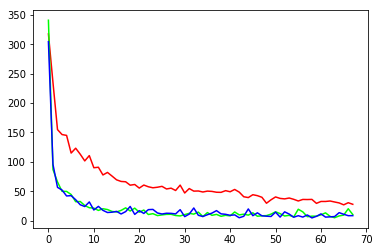

In [36]:
plt.plot(J[::100],color = "#FF0000")
plt.plot(J2[::100],color = "#00FF00")
plt.plot(J3[::100],color = "#0000FF")

Accuracy: 0.9673111111111111


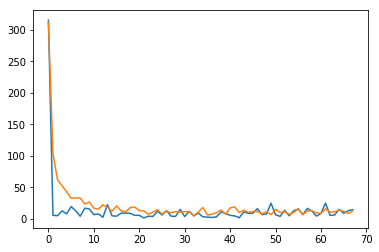

In [226]:
# Train the Model with nest_Momentum Gradient Descent 
# Scheduled Decay


W1 = W1_0.copy()
b1 = b1_0.copy()
W2 = W2_0.copy()
b2 = b2_0.copy()

J4 = []
eta = 3e-3
epochs = 15

mu = 0.9

k = 0.4
t = 0

etas = []

Vw2 = 0
Vw1 = 0
Vb2 = 0
Vb1 = 0


t0_m3 = dt.datetime.now()

for epoch in range(epochs):
    
    s = np.arange(X.shape[0])
    np.random.shuffle(s)
    
    X = X[s]
    Y = Y[s]
    
    #eta = eta/(k*epoch + 1)
    #eta = eta*np.exp(-k*epoch)
    #eta = eta*k**(epoch//3)
    
    
    for i in range(int(N/100)):
        
        t += 1
        
        eta = eta*(k**(t//1000))
        
        etas.append(eta)
        
        x_i = X[i*100:(i+1)*100,:]
        y_i = Y[i*100:(i+1)*100,:]
        
        z1_i, p_i = feed_forward(x_i, W1, b1, W2, b2)
        J4.append(cross_entropy(y_i,p_i))
        
        dH2 = p_i - y_i
        dW2 = np.matmul(z1_i.T, dH2)
        Vw2 = mu*Vw2 - eta*dW2
        Vb2 = mu*Vb2 -eta*dH2.sum(axis = 0)
        W2 += mu*Vw2 - eta*dW2
        b2 += mu*Vb2 - eta*dH2.sum(axis = 0)
        
        dZ1 = np.matmul(dH2, W2.T)
        dH1 = dZ1*(z1_i > 0)
        dW1 = np.matmul(x_i.T, dH1)
        Vw1 = mu*Vw1 - eta*dW1
        Vb1 = mu*Vb1 - eta*dH1.sum(axis = 0)
        W1 += mu*Vw1 - eta*dW1
        b1 += mu*Vb1 - eta*dH1.sum(axis = 0)
    
    

P = feed_forward(X, W1, b1, W2, b2)[-1]
print("Accuracy: {}".format(accuracy(Y,P)))
plt.plot(J4[::100])
plt.plot(J3[::100])
t_run_m3 = (dt.datetime.now() - t0_m3).seconds

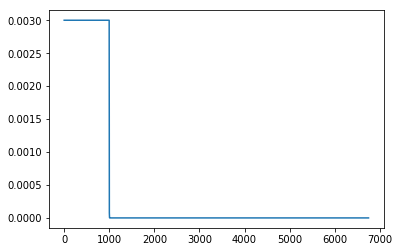

In [227]:
plt.plot(etas)

Accuracy: 0.9702888888888889


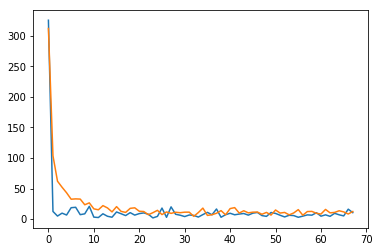

In [228]:
# Train the Model with nest_Momentum Gradient Descent
# Exponential Decay

W1 = W1_0.copy()
b1 = b1_0.copy()
W2 = W2_0.copy()
b2 = b2_0.copy()

J5 = []
eta = 1e-3
epochs = 15

mu = 0.9
k = 0.000001
t = 0

etas = []

Vw2 = 0
Vw1 = 0
Vb2 = 0
Vb1 = 0


t0_m3 = dt.datetime.now()

for epoch in range(epochs):
    
    s = np.arange(X.shape[0])
    np.random.shuffle(s)
    
    X = X[s]
    Y = Y[s]
    
    #eta = eta/(k*epoch + 1)
    #eta = eta*np.exp(-k*epoch)
    #eta = eta*k**(epoch//3)
    
    
    for i in range(int(N/100)):
        
        t += 1
        
        eta = eta*np.exp(-k*t)
        
        etas.append(eta)
        
        x_i = X[i*100:(i+1)*100,:]
        y_i = Y[i*100:(i+1)*100,:]
        
        z1_i, p_i = feed_forward(x_i, W1, b1, W2, b2)
        J5.append(cross_entropy(y_i,p_i))
        
        dH2 = p_i - y_i
        dW2 = np.matmul(z1_i.T, dH2)
        Vw2 = mu*Vw2 - eta*dW2
        Vb2 = mu*Vb2 -eta*dH2.sum(axis = 0)
        W2 += mu*Vw2 - eta*dW2
        b2 += mu*Vb2 - eta*dH2.sum(axis = 0)
        
        dZ1 = np.matmul(dH2, W2.T)
        dH1 = dZ1*(z1_i > 0)
        dW1 = np.matmul(x_i.T, dH1)
        Vw1 = mu*Vw1 - eta*dW1
        Vb1 = mu*Vb1 - eta*dH1.sum(axis = 0)
        W1 += mu*Vw1 - eta*dW1
        b1 += mu*Vb1 - eta*dH1.sum(axis = 0)
    
    

P = feed_forward(X, W1, b1, W2, b2)[-1]
print("Accuracy: {}".format(accuracy(Y,P)))
plt.plot(J5[::100])
plt.plot(J3[::100])
t_run_m3 = (dt.datetime.now() - t0_m3).seconds

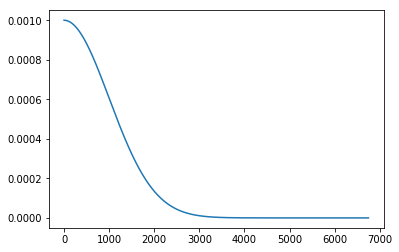

In [229]:
plt.plot(etas)

Accuracy: 0.9660666666666666


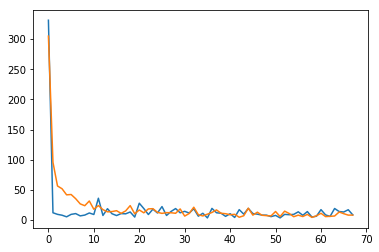

In [154]:
# Train the Model with nest_Momentum Gradient Descent
# Inverse Decay

W1 = W1_0.copy()
b1 = b1_0.copy()
W2 = W2_0.copy()
b2 = b2_0.copy()

J6 = []
eta = 1e-3
epochs = 15

mu = 0.9
k = 0.001
t = 0

etas = []


Vw2 = 0
Vw1 = 0
Vb2 = 0
Vb1 = 0


t0_m3 = dt.datetime.now()

for epoch in range(epochs):
    
    s = np.arange(X.shape[0])
    np.random.shuffle(s)
    
    X = X[s]
    Y = Y[s]
    
    #eta = eta/(k*epoch + 1)
    #eta = eta*np.exp(-k*epoch)
    #eta = eta*k**(epoch//3)
    
    
    for i in range(int(N/100)):
        
        t += 1
        eta = eta /(k*t +1)
        etas.append(eta)
        
        x_i = X[i*100:(i+1)*100,:]
        y_i = Y[i*100:(i+1)*100,:]
        
        z1_i, p_i = feed_forward(x_i, W1, b1, W2, b2)
        J6.append(cross_entropy(y_i,p_i))
        
        dH2 = p_i - y_i
        dW2 = np.matmul(z1_i.T, dH2)
        Vw2 = mu*Vw2 - eta*dW2
        Vb2 = mu*Vb2 -eta*dH2.sum(axis = 0)
        W2 += mu*Vw2 - eta*dW2
        b2 += mu*Vb2 - eta*dH2.sum(axis = 0)
        
        dZ1 = np.matmul(dH2, W2.T)
        dH1 = dZ1*(z1_i > 0)
        dW1 = np.matmul(x_i.T, dH1)
        Vw1 = mu*Vw1 - eta*dW1
        Vb1 = mu*Vb1 - eta*dH1.sum(axis = 0)
        W1 += mu*Vw1 - eta*dW1
        b1 += mu*Vb1 - eta*dH1.sum(axis = 0)
    
    

P = feed_forward(X, W1, b1, W2, b2)[-1]
print("Accuracy: {}".format(accuracy(Y,P)))
plt.plot(J6[::100])
plt.plot(J3[::100])
t_run_m3 = (dt.datetime.now() - t0_m3).seconds

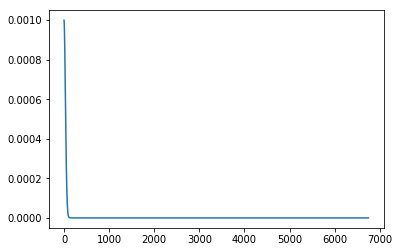

In [156]:
plt.plot(etas)